# Problem set 2. 
# Adapted from Statistics for linguists (Bodo Winters).

#2.1 Please, take your time to review the tidyverse style guide: 
# http://style.tidyverse.org/


#2.2 Now, have a look at the RStudio keyboard shortcut list:
#  https://support.rstudio.com/hc/en-us/articles/200711853-Keyboard-Shortcuts


#2.3 Cool, right? Now, think about which shortcuts you want to use in the future
# in your practice.


#2.4 Let's Subset a data frame with Tidyverse Function
# This exercise uses the nettle data frame to explore different ways of indexing
# using filter() and select(). First, load in the nettle data:


In [53]:
library(tidyverse)
nettle <- read.csv('/content/sample_data/nettle_1999_climate.csv')
head(nettle) # display first 6 rows
library(dplyr)

,Country,Population,Area,MGS,Langs
,<chr>,<dbl>,<dbl>,<dbl>,<int>
1,Algeria,4.41,6.38,6.60,18
2,Angola,4.01,6.10,6.22,42
3,Australia,4.24,6.89,6.00,234
4,Bangladesh,5.07,5.16,7.40,37
5,Benin,3.69,5.05,7.14,52
6,Bolivia,3.88,6.04,6.92,38


In [51]:
#Next, attempt to understand what the following commands do. Then execute them 
#in R and see whether the output matches your expectations.
filter(nettle, Country == 'Benin')

Country,Population,Area,MGS,Langs
<chr>,<dbl>,<dbl>,<dbl>,<int>
Benin,3.69,5.05,7.14,52


In [43]:
filter(nettle, Country %in% c('Benin', 'Zaire'))


Country,Population,Area,MGS,Langs
<chr>,<dbl>,<dbl>,<dbl>,<int>
Benin,3.69,5.05,7.14,52
Zaire,4.56,6.37,9.44,219


In [44]:
select(nettle, Langs)

Langs
<int>
18
42
234
37
52
38
27
209
75


In [45]:

filter(nettle, Country == 'Benin') %>% select(Langs)


Langs
<int>
52


In [46]:
filter(nettle, Country == 'Benin') %>%
  select(Population:MGS)
# from country, go to Benin, and print the columns from 'Population' tp 'MGS'

Population,Area,MGS
<dbl>,<dbl>,<dbl>
3.69,5.05,7.14


In [47]:
filter(nettle, Langs > 200)
# print only Langs that are more than 200

Country,Population,Area,MGS,Langs
<chr>,<dbl>,<dbl>,<dbl>,<int>
Australia,4.24,6.89,6.00,234
Brazil,5.19,6.93,9.71,209
Cameroon,4.09,5.68,9.17,275
India,5.93,6.52,5.32,405
Indonesia,5.27,6.28,10.67,701
Mexico,4.94,6.29,5.84,243
Nigeria,5.05,5.97,7.00,427
Papua New Guinea,3.58,5.67,10.88,862
Zaire,4.56,6.37,9.44,219


In [48]:
filter(nettle, Langs > 200, Population < median(Population))

Country,Population,Area,MGS,Langs
<chr>,<dbl>,<dbl>,<dbl>,<int>
Papua New Guinea,3.58,5.67,10.88,862


In [40]:


#2.5 Exercise: Creating a Pipeline
#Execute the following code in R (you may omit the comments for now) and then 
#read the explanation below.
# Reduce the nettle tibble to small countries:
smallcountries <- filter(nettle, Population < 4)


In [14]:
# Create categorical MGS variable:
nettle_MGS <- mutate(smallcountries,
                     MGS_cat = ifelse(MGS < 6, 'dry', 'fertile'))
# Group tibble for later summarizing:

In [30]:
nettle_MGS_grouped <- group_by(nettle_MGS, MGS_cat)

In [16]:

# Compute language counts for categorical MGS variable:
summarize(nettle_MGS_grouped, LangSum = sum(Langs))

MGS_cat,LangSum
<chr>,<int>
dry,447
fertile,1717


In [17]:
#The previous code reduces the nettle tibble to small countries (Population < 4).
# The resulting tibble, smallcountries, is changed using the ifelse() function.
#In this case, the function splits the dataset into countries with high and low 
#ecological risk, using six months as a threshold. The ifelse() function spits 
# out 'dry' when MGS < 6 is TRUE and 'fertile' when MGS < 6 is FALSE. Then, the 
#resulting tibble is grouped by this categorical ecological risk measure. 
#As a result of the grouping, the subsequently executed summarize() function
#knows that summary statistics should be computed based on this grouping variable.
# This code is quite cumbersome! In particular, there are many intervening 
#tibbles (smallcountries, nettle_MGS, and nettle_MGS_grouped) that might not be
# used anywhere else in the analysis. For example, the grouping is only necessary
# so that the summarize() function knows what groups to perform summary statistics for.
#These tibbles are fairly dispensable. Can you condense all of these steps into a 
#single pipeline where the nettle tibble is first piped to filter(), then to mutate(), 
#then to group_by(), and finally to summarize()?


In [76]:
smallcountries %>% mutate(smallcountries,
                     MGS_cat = ifelse(MGS < 6, 'dry', 'fertile')) %>% group_by(MGS_cat) %>% summarize(nettle, LangSum = sum(Langs))

`summarise()` has grouped output by 'MGS_cat'. You can override using the `.groups` argument.



MGS_cat,Country,Population,Area,MGS,Langs,LangSum
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>
dry,Algeria,4.41,6.38,6.60,18,6640
dry,Angola,4.01,6.10,6.22,42,6640
dry,Australia,4.24,6.89,6.00,234,6640
dry,Bangladesh,5.07,5.16,7.40,37,6640
dry,Benin,3.69,5.05,7.14,52,6640
dry,Bolivia,3.88,6.04,6.92,38,6640
dry,Botswana,3.13,5.76,4.60,27,6640
dry,Brazil,5.19,6.93,9.71,209,6640
dry,Burkina Faso,3.97,5.44,5.17,75,6640


In [77]:
library(ggplot2)

In [78]:
#2.6. Plotting a Histogram of the Emotional Valence Ratings:
#With the Warriner et al. (2013) data, create a ggplot2 histogram and plot the 
#mean as a vertical line into the plot using geom_vline() and the xintercept aesthetic. 
#Can you additionally add vertical dashed lines to indicate where 68% and 95% of the data lie? 
#(Ignore any warning messages about binwidth that may arise).
Warriner <- read_csv('/content/sample_data/warriner_2013_emotional_valence.csv')

Rows: 13915 Columns: 2

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Word
dbl (1): Val


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [79]:
head(Warriner)

Word,Val
<chr>,<dbl>
aardvark,6.26
abalone,5.30
abandon,2.84
abandonment,2.63
abbey,5.85
abdomen,5.43


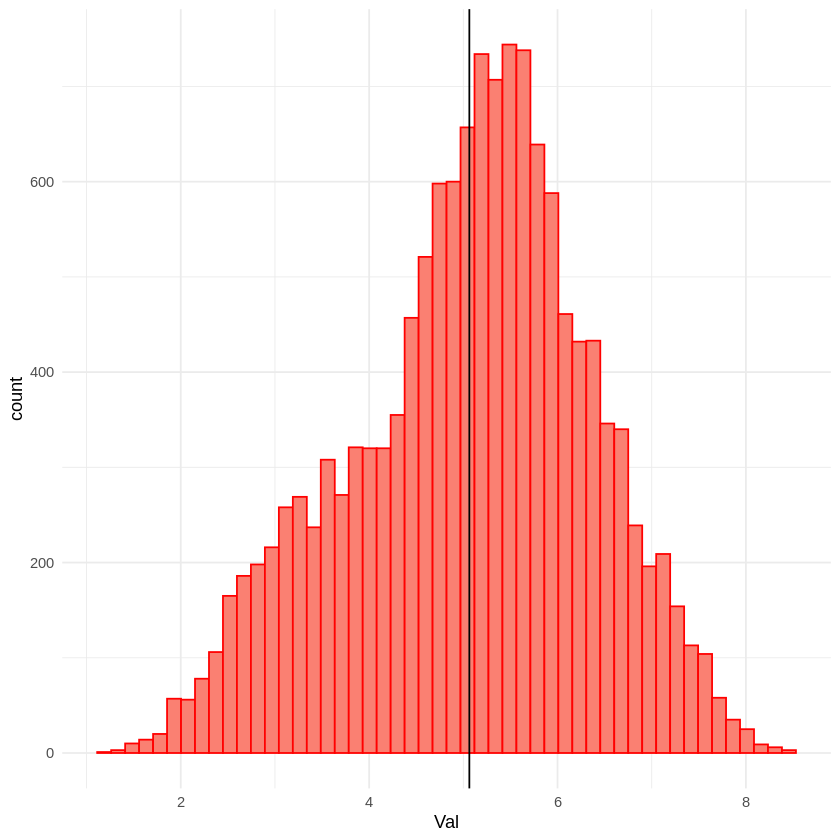

In [87]:
ggplot(Warriner, aes(x=Val)) +
  geom_histogram(bins = 50, fill = 'salmon', col= 'red') +
  geom_vline(aes(xintercept = mean(Warriner$Val)), linetype = 1) +
  theme_minimal()

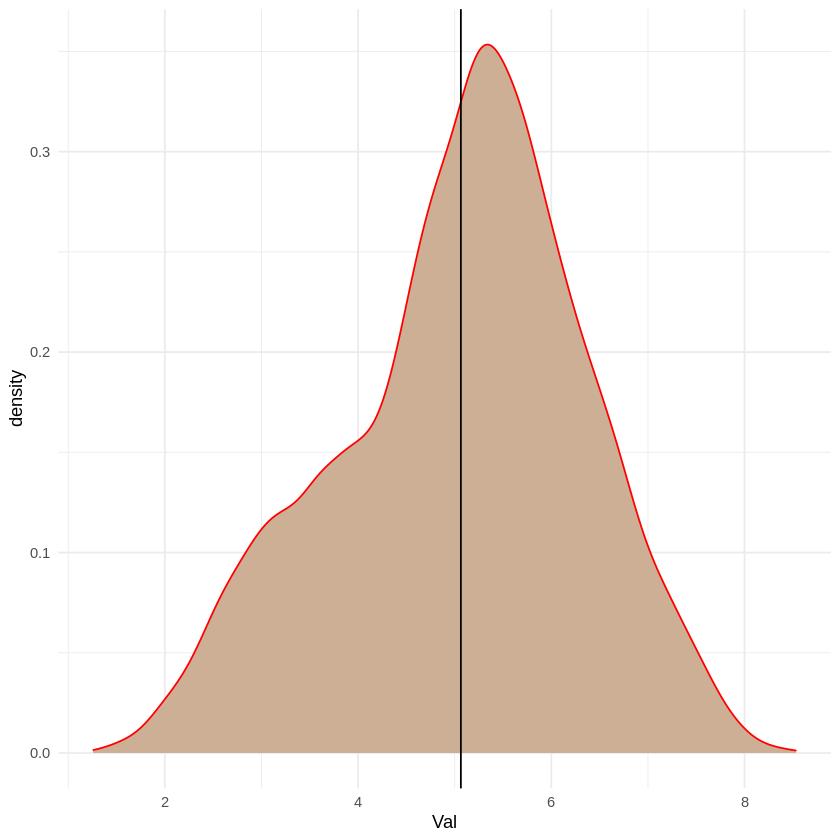

In [91]:
#2.7 Plotting Density Graphs:
#In the plot you created in the last exercise, exchange geom_histogram() with 
#geom_density(), which produces a kernel density graph. This is a plot that won't 
#be covered in this book, but by looking at it you may be able to figure out that
# it is essentially a smoothed version of a histogram. There are many other geoms
# to explore. Check out the vast ecosystem of online tutorials for different types of ggplot2 functions.
  
ggplot(Warriner, aes(x=Val)) +
  geom_density(fill = 'peachpuff3', col= 'red') +
  geom_vline(aes(xintercept = mean(Warriner$Val)), linetype = 1) +
  theme_minimal()

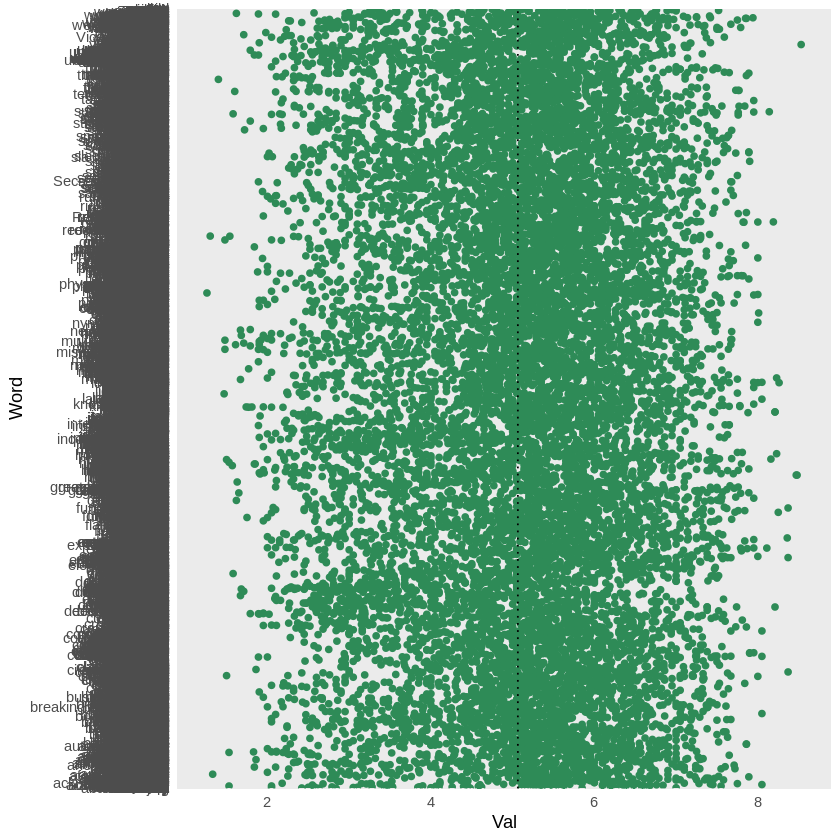

In [114]:
ggplot(Warriner, aes(x=Val, y =Word)) +
  geom_point(fill = 'red', color= 'seagreen') +
  geom_vline(aes(xintercept = mean(Warriner$Val)), linetype = 3) +
  theme_minimal()

In [116]:
install.packages('plotly')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘later’, ‘htmlwidgets’, ‘lazyeval’, ‘crosstalk’, ‘promises’




In [ ]:
library(plotly)
ggplotly(ggplot(Warriner, aes(x=Val, y =Word)) +
  geom_point(fill = 'red', color= 'seagreen') +
  geom_vline(aes(xintercept = mean(Warriner$Val)), linetype = 3) +
  theme_minimal())

In [92]:
glimpse(Warriner)

Rows: 13,915
Columns: 2
$ Word <chr> "aardvark", "abalone", "abandon", "abandonment", "abbey", "abdome…
$ Val  <dbl> 6.26, 5.30, 2.84, 2.63, 5.85, 5.43, 4.48, 2.42, 2.05, 5.52, 5.57,…


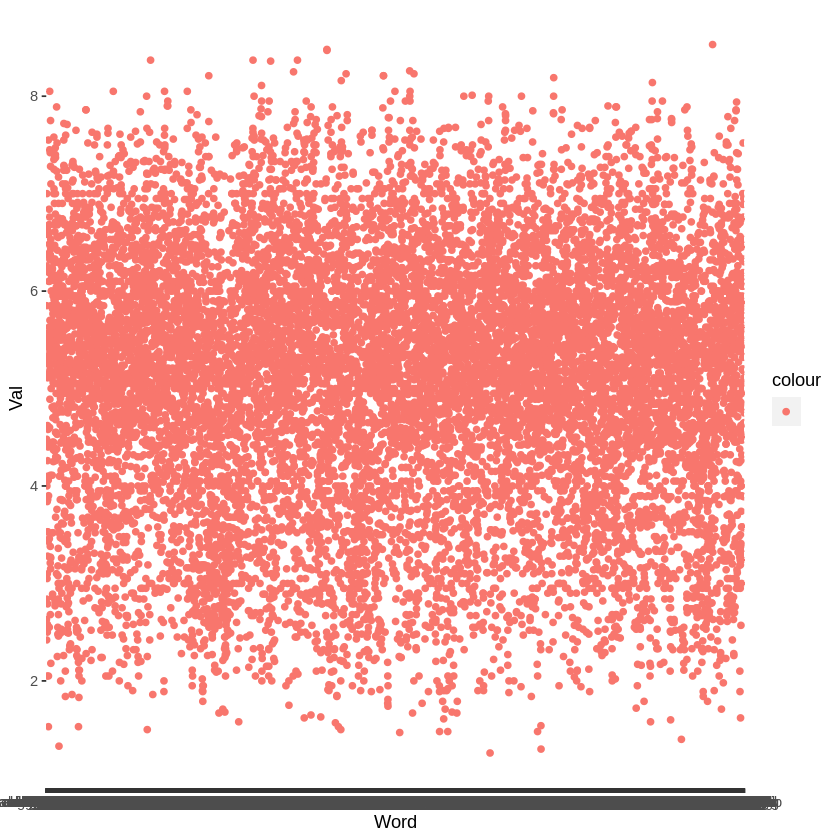

In [121]:
warr <- Warriner %>%
ggplot(aes(x = Word, y = Val, col = '')) +
geom_point()

warr